<a href="https://colab.research.google.com/github/rpatel0022/CS235_DataMining_Project/blob/main/%5BCS235F25%5D_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS235 Fall 2025 Course Project

Name: Rushi Patel, Mahir Patel

Student ID: 862385738, 862338784

## Introduction
In this project, a number of data mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Setup

1. Create new python environment for the project

- This is not necessary on Google Colab but a good practice on your local machine

2. Install the required packages

In [1]:
!pip install ucimlrepo

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

## Load Data

In [3]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

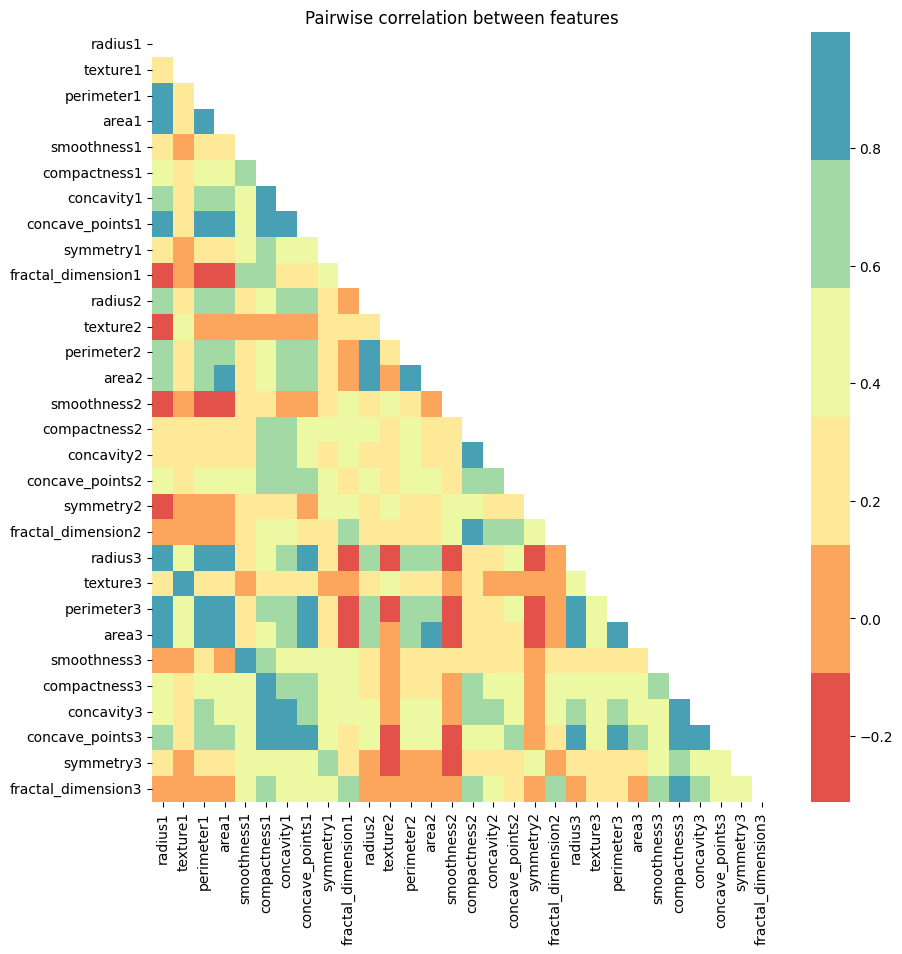

In [4]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class Counts

In [5]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

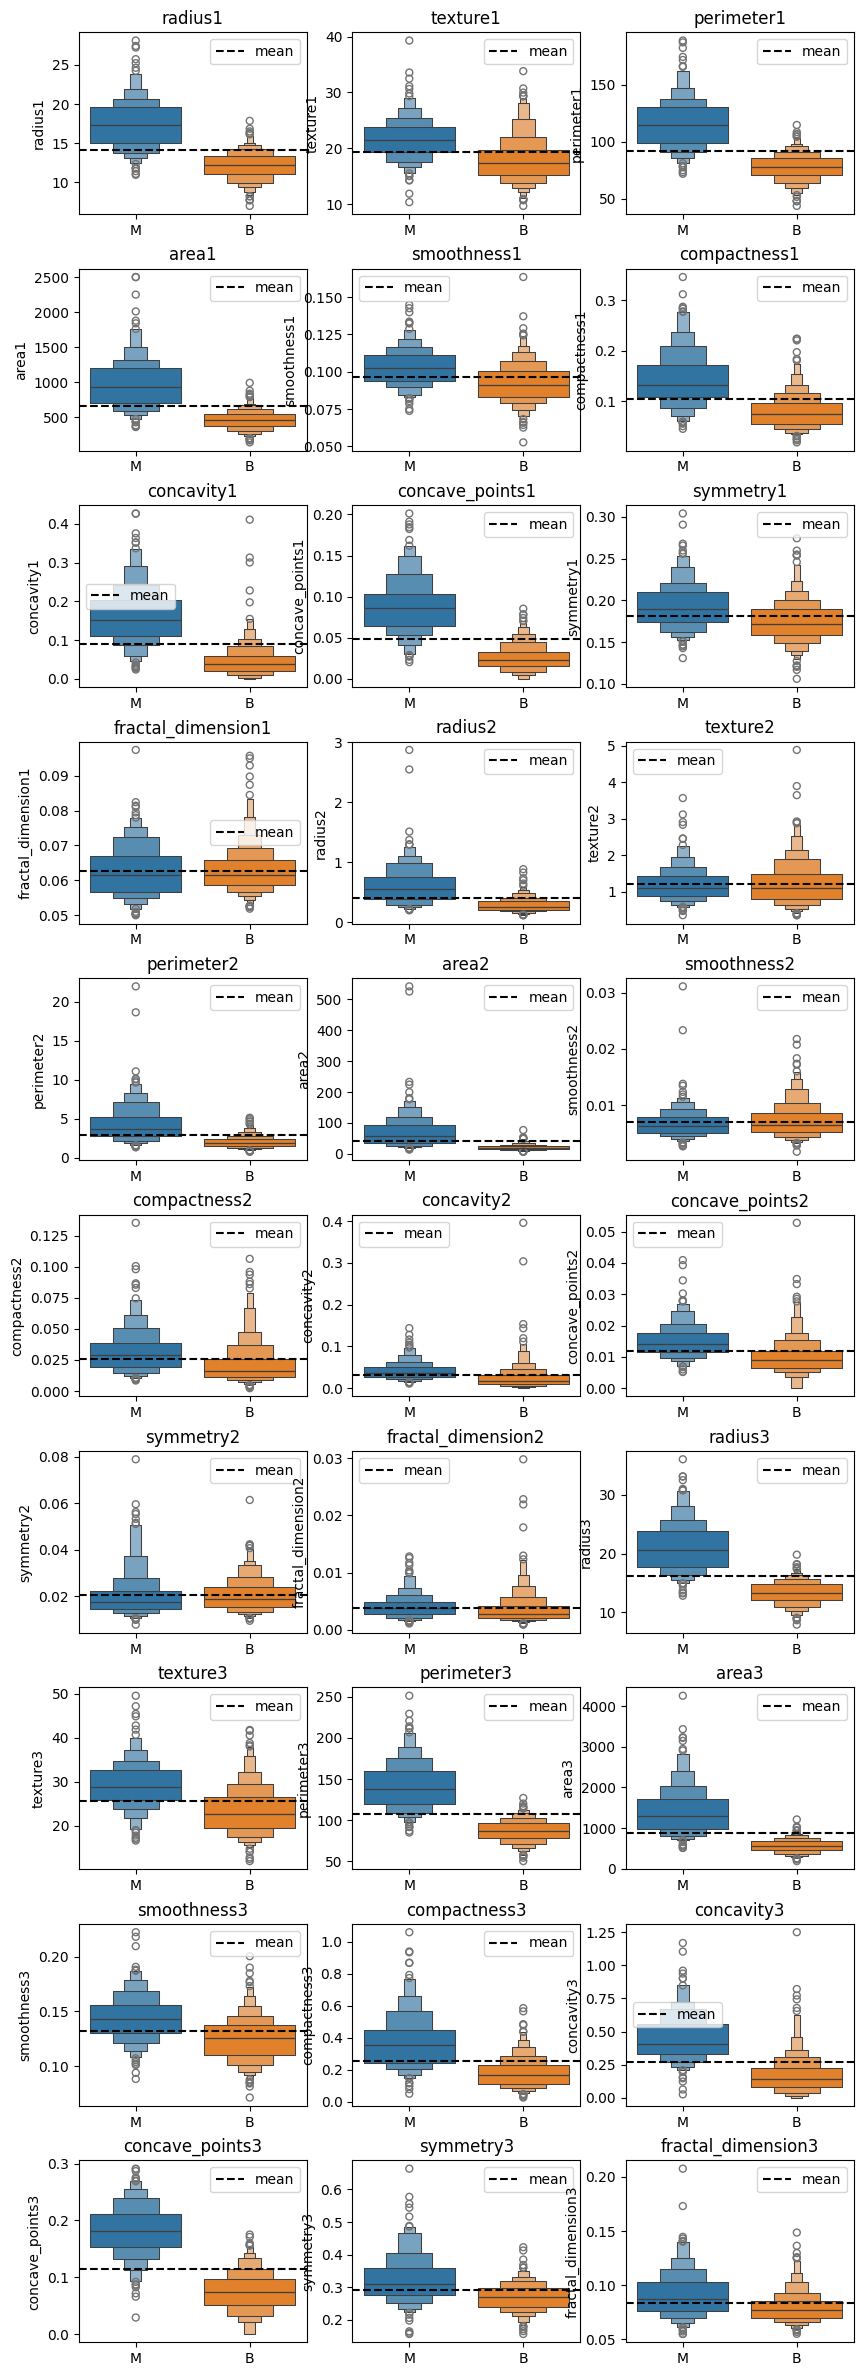

In [6]:
plt.figure(figsize=(10,30))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(10,3,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

## Q1 - Implementing simple classifiers

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [9]:
import numpy as np
from collections import Counter

class DecisionTreeClassifierIG:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        """Calculate entropy of labels."""
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def information_gain(self, X_column, y, threshold):
        """Calculate Information Gain for a given split threshold."""
        parent_entropy = self.entropy(y)

        # Split data
        left_mask = X_column <= threshold
        right_mask = X_column > threshold
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0

        # Weighted average of child entropies
        n = len(y)
        n_left, n_right = np.sum(left_mask), np.sum(right_mask)
        e_left, e_right = self.entropy(y[left_mask]), self.entropy(y[right_mask])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        # IG = parent entropy - weighted child entropy
        return parent_entropy - child_entropy

    def best_split(self, X, y):
        """Find the best feature and threshold that gives highest IG."""
        best_feature, best_threshold, best_gain = None, None, -1
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self.information_gain(X[:, feature_idx], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold
        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        """Recursively build the tree."""
        labels = Counter(y)
        most_common_label = labels.most_common(1)[0][0]

        # Stop if pure or reached depth limit
        if len(labels) == 1 or (self.max_depth and depth >= self.max_depth):
            return most_common_label

        feature, threshold = self.best_split(X, y)
        if feature is None:
            return most_common_label

        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold
        left_branch = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_branch = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return {"feature": feature, "threshold": threshold,
                "left": left_branch, "right": right_branch}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_one(self, x, tree=None):
        """Predict for a single sample."""
        if tree is None:
            tree = self.tree
        if not isinstance(tree, dict):
            return tree
        feature, threshold = tree["feature"], tree["threshold"]
        branch = tree["left"] if x[feature] <= threshold else tree["right"]
        return self.predict_one(x, branch)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

In [7]:
import numpy as np

class GaussianNaiveBayes:
    #Implementation of guassianNaiveBayes from scratch

    def __init__(self, epsilon=1e-9):
        #Initialized the variables in the class.
        self.epsilon = epsilon
        self.classes = None
        self.mean = {}
        self.var = {}
        self.prior = {}

    def fit(self, X, y):
        #This portions learns the model by summarizing each class distribution
        self.classes = np.unique(y)

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + self.epsilon
            self.prior[c] = X_c.shape[0] / X.shape[0]

    def _gaussian_likelihood(self, class_label, x):
       #This applies gaussian's probility density and the result shows how likely each feature value is for that given class
        mean = self.mean[class_label]
        var = self.var[class_label]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        likelihood = numerator / denominator

        # Clip to avoid zeros in log
        return np.clip(likelihood, 1e-15, None)

    def _posterior(self, x):
        #This applies bayes theorem by figuring out the prior log and the likelihood log
        posteriors = {}
        for c in self.classes:
            prior_log = np.log(self.prior[c])
            likelihood_log = np.sum(np.log(self._gaussian_likelihood(c, x)))
            posteriors[c] = prior_log + likelihood_log
        return posteriors

    def predict(self, X):
        #This computes the posterior probabilities for all classes and picks the class with the maximum posterior
        preds = []
        for x in X:
            posteriors = self._posterior(x)
            preds.append(max(posteriors, key=posteriors.get))
        return np.array(preds)

    def predict_proba(self, X):
        #Returns the normalized probabilities
        probs = []
        for x in X:
            posteriors = self._posterior(x)
            exp_vals = np.exp(list(posteriors.values()))
            norm_probs = exp_vals / np.sum(exp_vals)
            probs.append(norm_probs)
        return np.array(probs)


In [10]:

# EVALUATION OF Naive Bayes
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

y_encoded = LabelEncoder().fit_transform(y['Diagnosis'])


# Evaluate with Stratified 10-Fold CV
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scores_decision_tree = []

for train_idx, test_idx in skf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    model = DecisionTreeClassifierIG(max_depth=3)
    model.fit(X_train.values, y_train)
    preds = model.predict(X_test.values)

    f1 = f1_score(y_test, preds)
    f1_scores_decision_tree.append(f1)

print(f"Average F1 Score: {np.mean(f1_scores_decision_tree):.4f} ± {np.std(f1_scores_decision_tree):.4f}")

Average F1 Score: 0.8844 ± 0.0659


In [12]:

# EVALUATION OF DECISION TRESS

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

y_encoded = LabelEncoder().fit_transform(y['Diagnosis'])


# Evaluate with Stratified 10-Fold CV
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scores_naive_bayes = []

for train_idx, test_idx in skf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    model = GaussianNaiveBayes()
    model.fit(X_train.values, y_train)
    preds = model.predict(X_test.values)

    f1 = f1_score(y_test, preds)
    f1_scores_naive_bayes.append(f1)

print(f"Average F1 Score: {np.mean(f1_scores_naive_bayes):.4f} ± {np.std(f1_scores_naive_bayes):.4f}")

Average F1 Score: 0.9061 ± 0.0436


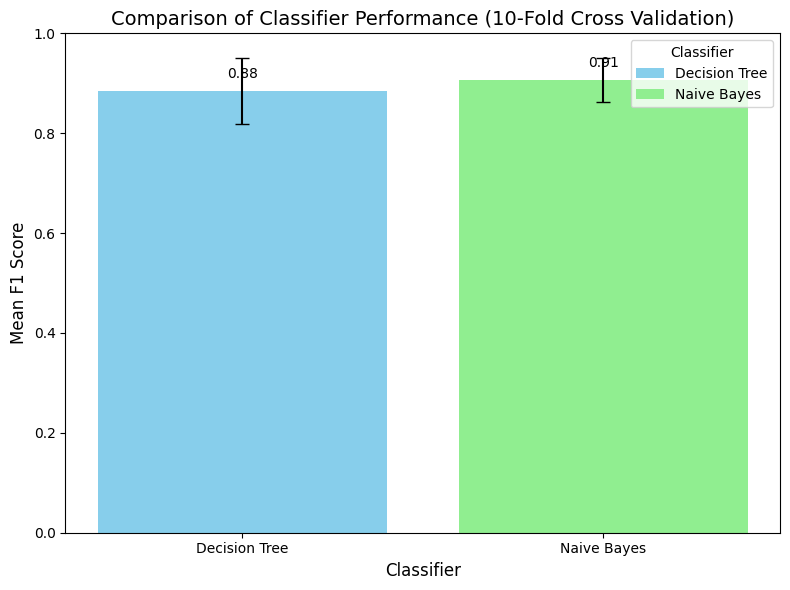

In [13]:
# [YOUR PLOTTING CODE HERE]
# Calculate mean and standard deviation for each classifier
means = [np.mean(f1_scores_decision_tree), np.mean(f1_scores_naive_bayes)]
stds = [np.std(f1_scores_decision_tree), np.std(f1_scores_naive_bayes)]

# Classifier labels
classifiers = ['Decision Tree', 'Naive Bayes']

# Define colors
colors = ['skyblue', 'lightgreen']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, means, yerr=stds, capsize=5, color=colors, label=classifiers)

# Add labels and title
plt.ylabel('Mean F1 Score', fontsize=12)
plt.xlabel('Classifier', fontsize=12)
plt.title('Comparison of Classifier Performance (10-Fold Cross Validation)', fontsize=14)
plt.ylim(0, 1)

# Add legend
plt.legend(title='Classifier')

# Add numerical labels on top of each bar
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, mean + 0.02, f'{mean:.2f}',
             ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()



## Q2 - Dimensionality reduction with the Singular Value Decomposition

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [14]:
# [YOUR IMPLEMENTATION CODE HERE]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

# Define SVD transform function
def svd_transform(X_train, X_test, k):
    # Center the training data (subtract mean)
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    # Perform SVD on the training set
    U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)

    # Keep top-k components
    Vt_k = Vt[:k, :]

    # Project both train and test sets
    X_train_reduced = np.dot(X_train_centered, Vt_k.T)
    X_test_reduced = np.dot(X_test_centered, Vt_k.T)

    return X_train_reduced, X_test_reduced


#Set up CV and models
ranks = [2, 5, 10, 15, 20, 25, 30]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_encoded = LabelEncoder().fit_transform(y['Diagnosis'])

results_tree = []
results_nb = []

#Evaluate models across SVD ranks
for k in ranks:
    f1_tree, f1_nb = [], []

    for train_idx, test_idx in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_idx].values, X.iloc[test_idx].values
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        # Apply SVD dimensionality reduction (train SVD only on train set)
        X_train_red, X_test_red = svd_transform(X_train, X_test, k)

        # --- Decision Tree ---
        tree = DecisionTreeClassifierIG(max_depth=3)
        tree.fit(X_train_red, y_train)
        preds_tree = tree.predict(X_test_red)
        f1_tree.append(f1_score(y_test, preds_tree))

        # --- Naive Bayes ---
        nb = GaussianNaiveBayes()
        nb.fit(X_train_red, y_train)
        preds_nb = nb.predict(X_test_red)
        f1_nb.append(f1_score(y_test, preds_nb))

    results_tree.append((np.mean(f1_tree), np.std(f1_tree)))
    results_nb.append((np.mean(f1_nb), np.std(f1_nb)))

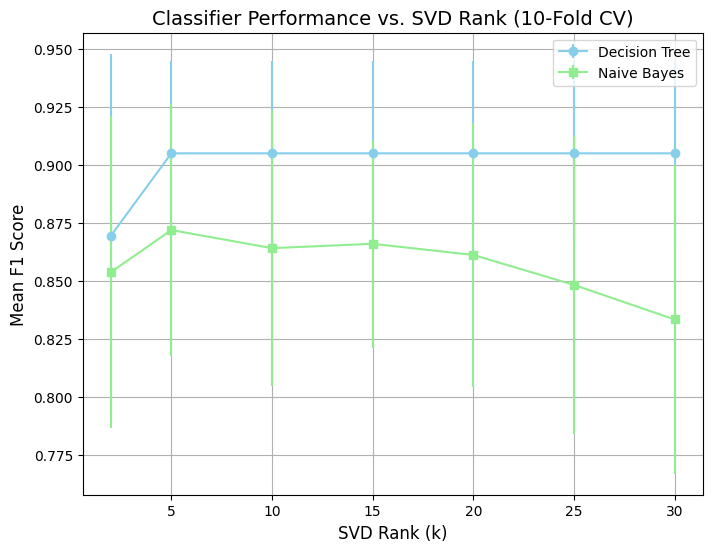

In [15]:
# [YOUR PLOTTING CODE HERE]
means_tree = [m for m, _ in results_tree]
stds_tree = [s for _, s in results_tree]
means_nb = [m for m, _ in results_nb]
stds_nb = [s for _, s in results_nb]

plt.figure(figsize=(8,6))
plt.errorbar(ranks, means_tree, yerr=stds_tree, fmt='-o', color='skyblue', label='Decision Tree')
plt.errorbar(ranks, means_nb, yerr=stds_nb, fmt='-s', color='lightgreen', label='Naive Bayes')
plt.xlabel('SVD Rank (k)', fontsize=12)
plt.ylabel('Mean F1 Score', fontsize=12)
plt.title('Classifier Performance vs. SVD Rank (10-Fold CV)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## Q3 - Feature selection with randomization

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [16]:
# [YOUR IMPLEMENTATION CODE HERE]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

# Split dataset (20% for feature selection)
y_encoded = LabelEncoder().fit_transform(y['Diagnosis'])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, feat_idx in sss.split(X, y_encoded):
    X_feat, y_feat = X.iloc[feat_idx].copy(), y_encoded[feat_idx]  # 20% subset for feature selection

# compute mean F1 using 5-fold CV
def mean_f1(model_class, X_data, y_data, **model_kwargs):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    for train_idx, test_idx in skf.split(X_data, y_data):
        X_train, X_test = X_data.iloc[train_idx].values, X_data.iloc[test_idx].values
        y_train, y_test = y_data[train_idx], y_data[test_idx]
        model = model_class(**model_kwargs)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        f1_scores.append(f1_score(y_test, preds))
    return np.mean(f1_scores)

# Baseline F1 (no permutation)
baseline_tree = mean_f1(DecisionTreeClassifierIG, X_feat, y_feat, max_depth=3)
baseline_nb = mean_f1(GaussianNaiveBayes, X_feat, y_feat)

print(f"Baseline Decision Tree F1: {baseline_tree:.4f}")
print(f"Baseline Naive Bayes F1: {baseline_nb:.4f}")

# Randomization test per feature
importances_tree = []
importances_nb = []

for col in X_feat.columns:
    X_perm = X_feat.copy()
    X_perm[col] = np.random.permutation(X_perm[col])  # randomize this feature

    # Compute new performance
    perm_tree = mean_f1(DecisionTreeClassifierIG, X_perm, y_feat, max_depth=3)
    perm_nb = mean_f1(GaussianNaiveBayes, X_perm, y_feat)

    # Compute performance drop (%)
    drop_tree = max(0, (baseline_tree - perm_tree) / baseline_tree * 100)
    drop_nb = max(0, (baseline_nb - perm_nb) / baseline_nb * 100)

    importances_tree.append(drop_tree)
    importances_nb.append(drop_nb)

# Create DataFrame + Rank Features
importance_df = pd.DataFrame({
    'Feature': X_feat.columns,
    'DecisionTree_Importance(%)': importances_tree,
    'NaiveBayes_Importance(%)': importances_nb
}).sort_values(by='DecisionTree_Importance(%)', ascending=False)

display(importance_df.head(10))  # preview top 10 features


Baseline Decision Tree F1: 0.8400
Baseline Naive Bayes F1: 0.9126


,Feature,DecisionTree_Importance(%),NaiveBayes_Importance(%)
14,smoothness2,1.785805,1.145897
17,concave_points2,0.651961,0.000000
2,perimeter1,0.000000,0.000000
3,area1,0.000000,0.000000
0,radius1,0.000000,0.000000
1,texture1,0.000000,0.000000
6,concavity1,0.000000,0.000000
7,concave_points1,0.000000,0.000000
8,symmetry1,0.000000,0.000000
9,fractal_dimension1,0.000000,0.000000


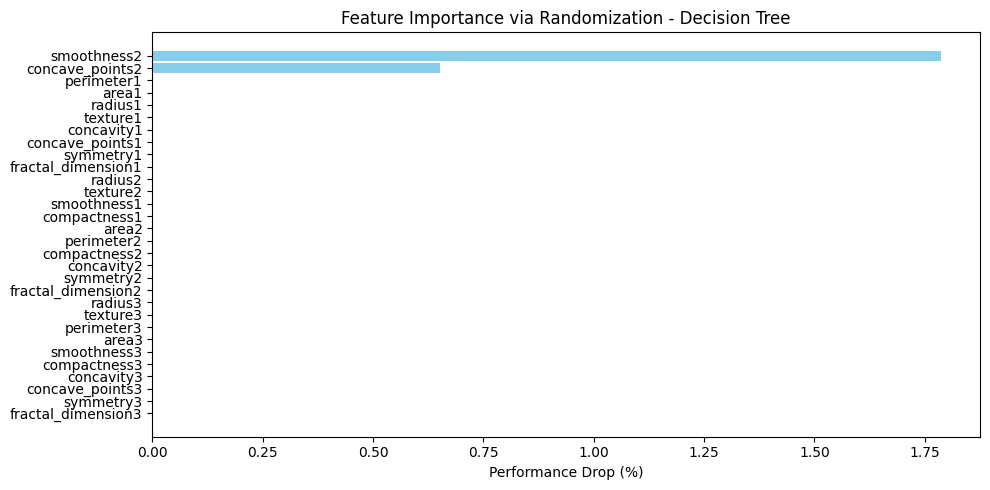

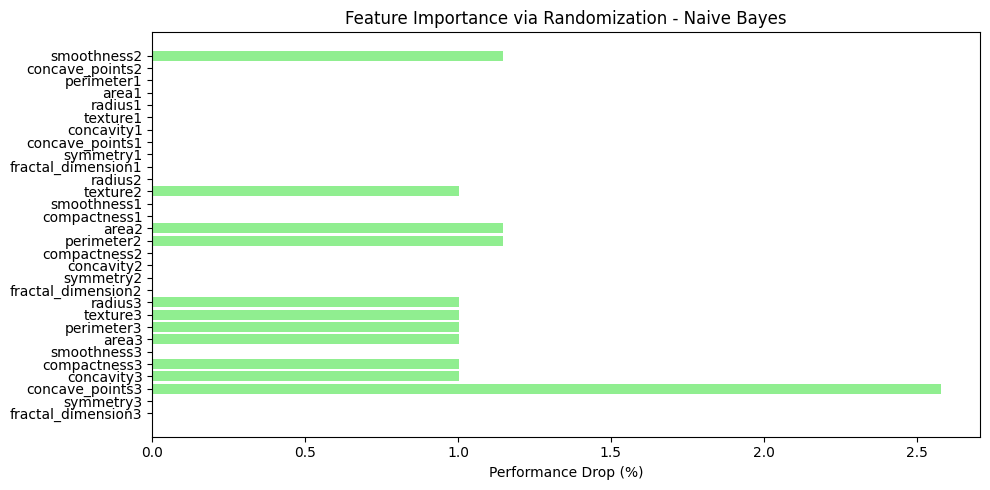

In [17]:
# [YOUR PLOTTING CODE HERE]

# Plot importance (2 figures)
plt.figure(figsize=(10,5))
plt.barh(importance_df['Feature'], importance_df['DecisionTree_Importance(%)'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance via Randomization - Decision Tree")
plt.xlabel("Performance Drop (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.barh(importance_df['Feature'], importance_df['NaiveBayes_Importance(%)'], color='lightgreen')
plt.gca().invert_yaxis()
plt.title("Feature Importance via Randomization - Naive Bayes")
plt.xlabel("Performance Drop (%)")
plt.tight_layout()
plt.show()

In [18]:
importance_df.to_csv("feature_importance_randomization.csv", index=False)

## Q4 - Data augmentation using SMOTE

In [19]:
# [YOUR IMPLEMENTATION CODE HERE]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

# SMOTE implementation
def smote(X, y, oversample_pct=100, k=5):
    """
    Simple SMOTE implementation.
    oversample_pct: how many % of new samples to generate (e.g. 100 = double minority size)
    k: number of neighbors to use
    """
    X = np.array(X)
    y = np.array(y)

    # Separate minority and majority samples
    minority_class = np.argmin(np.bincount(y))
    X_minority = X[y == minority_class]
    n_minority = len(X_minority)

    # Number of synthetic samples to generate
    n_synth = n_minority * oversample_pct // 100

    # Fit nearest neighbors
    neigh = NearestNeighbors(n_neighbors=k + 1)  # +1 for self
    neigh.fit(X_minority)
    neighbors = neigh.kneighbors(X_minority, return_distance=False)[:, 1:]

    synthetic_samples = []
    for _ in range(n_synth):
        i = np.random.randint(0, n_minority)
        nn = np.random.choice(neighbors[i])
        diff = X_minority[nn] - X_minority[i]
        gap = np.random.rand()
        new_sample = X_minority[i] + gap * diff
        synthetic_samples.append(new_sample)

    X_synth = np.vstack([X, np.array(synthetic_samples)])
    y_synth = np.hstack([y, np.full(len(synthetic_samples), minority_class)])
    return X_synth, y_synth


# Evaluation across SMOTE configs
oversample_rates = [100, 200, 300]
k_values = [1, 5]
models = {
    "Decision Tree": DecisionTreeClassifierIG(max_depth=3),
    "Naive Bayes": GaussianNaiveBayes()
}

y_encoded = LabelEncoder().fit_transform(y['Diagnosis'])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = {model_name: {k: [] for k in k_values} for model_name in models}

for oversample_pct in oversample_rates:
    for k in k_values:
        for model_name, model in models.items():
            f1_scores = []

            for train_idx, test_idx in skf.split(X, y_encoded):
                X_train, X_test = X.iloc[train_idx].values, X.iloc[test_idx].values
                y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

                # Apply SMOTE to the training data
                X_train_aug, y_train_aug = smote(X_train, y_train, oversample_pct=oversample_pct, k=k)

                # Train model and evaluate
                model.fit(X_train_aug, y_train_aug)
                preds = model.predict(X_test)
                f1_scores.append(f1_score(y_test, preds))

            results[model_name][k].append((oversample_pct, np.mean(f1_scores), np.std(f1_scores)))


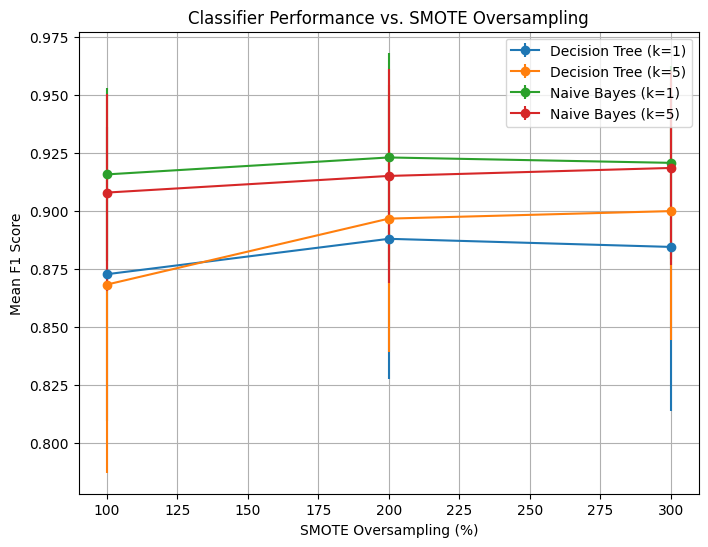

In [20]:
# [YOUR PLOTTING CODE HERE]
# Plot results
plt.figure(figsize=(8,6))
for model_name, k_dict in results.items():
    for k, vals in k_dict.items():
        x = [v[0] for v in vals]
        y = [v[1] for v in vals]
        yerr = [v[2] for v in vals]
        plt.errorbar(x, y, yerr=yerr, fmt='-o', label=f"{model_name} (k={k})")

plt.xlabel('SMOTE Oversampling (%)')
plt.ylabel('Mean F1 Score')
plt.title('Classifier Performance vs. SMOTE Oversampling')
plt.legend()
plt.grid(True)
plt.show()